<a href="https://colab.research.google.com/github/nisanuro/CNG562-Assignment-1/blob/master/CNG562_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNG 562 - Assignment #1**

Linear Regression vs Logistic Regression using Iris Dataset\
Comparing:
*   Random 1-Hold Out
*   5-Fold
*   10-Fold
*   Strafied 1-Hold Out

\
Nisa Nur Odabaş\
Kaan Taha Köken

---



In [0]:
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics, datasets, preprocessing
from sklearn.metrics import roc_curve, auc
%matplotlib inline

**K-Fold method**

In [0]:
def kFold(foldNumber, X_train, Y_train):

  kf = KFold(n_splits=foldNumber, shuffle=False)  

  logReg = LogisticRegression(solver='liblinear', multi_class='ovr')
  linReg = LinearRegression()  

  cv_result_log = cross_val_score(logReg, X_train, Y_train, cv=kf, scoring='accuracy')
  cv_result_lin = cross_val_score(linReg, X_train, Y_train, cv=kf, scoring='neg_mean_squared_error')

  print(str(foldNumber) + "Fold")
  print("Logistic Regression Accuracy: ", cv_result_log.mean())
  print("Linear Regression Accuracy: ", 1 + cv_result_lin.mean())

**Random 1-Hold Out method**

In [0]:
def randomOneHoldout(X_train, Y_train):

  x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)
  
  logReg = LogisticRegression(solver='liblinear', multi_class='ovr')
  linReg = LinearRegression()

  logReg.fit(x_train, y_train)
  linReg.fit(x_train, y_train)

  y_pred_log = logReg.predict(x_test)
  y_pred_lin = linReg.predict(x_test)
  
  print("Random One Hold Out")
  print("Logistic Regression Accuracy: ", 1 - metrics.mean_squared_error(y_test, y_pred_log))
  print("Linear Regression Accuracy: ", 1 - metrics.mean_squared_error(y_test, y_pred_lin))

**Stratified 1-Hold Out method**

In [0]:
def stratifiedOneHoldout(X_train, Y_train):
  
  x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=0, stratify=Y_train)
  
  logReg = LogisticRegression(solver='liblinear', multi_class='ovr')
  linReg = LinearRegression()

  logReg.fit(x_train, y_train)
  linReg.fit(x_train, y_train)

  y_pred_log = logReg.predict(x_test)
  y_pred_lin = linReg.predict(x_test)
  
  print("Stratified")
  print("Logistic Regression Accuracy: ", 1 - metrics.mean_squared_error(y_test, y_pred_log))
  print("Linear Regression Accuracy: ", 1 - metrics.mean_squared_error(y_test, y_pred_lin))

**Displaying accuracies for all validation methods**

In [0]:
def displayAccuracy(X, Y):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    
    kFold(5, X_train, Y_train)    
    kFold(10, X_train, Y_train)    
    randomOneHoldout(X_train, Y_train)
    stratifiedOneHoldout(X_train, Y_train)

**Round method for linear regression prediction**

In [0]:
def roundPredict(p):
    r = p.copy()
    for i in range(len(r)):
        if r[i] <= 0.5: r[i] = 0
        elif r[i] >= 1.5: r[i] = 2
        else: r[i] = 1
    return r

**Display method for ROC curve**

In [0]:
def displayROC(fpr, tpr, roc_auc):
  plt.figure()
  plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example')
  plt.legend(loc="lower right")
  plt.show()

**Main**

In [149]:
if __name__ == '__main__':

  iris = datasets.load_iris()
  
  X = iris.data
  Y = iris.target
  
  # L1 normalization
  l1_norm = preprocessing.normalize(X, norm="l1")
  # Mean removal
  mean_removal = preprocessing.scale(X)

  '''#mean & standart deviation before mean removal 
  print(X.mean(axis=0))
  print(X.std(axis=0))

  #mean & standart deviation after mean removal 
  print(mean_removal.mean(axis=0))
  print(mean_removal.std(axis=0))'''

  #Displaying result according to each type of methods and regression model
  print("\nRaw: ")
  displayAccuracy(X,Y)
  print("\nL1 Normalization: ")
  displayAccuracy(l1_norm,Y)
  print("\nMean Removal: ")
  displayAccuracy(mean_removal,Y)


Raw: 
5Fold
Logistic Regression Accuracy:  0.9333333333333333
Linear Regression Accuracy:  0.9497273362310497
10Fold
Logistic Regression Accuracy:  0.9333333333333332
Linear Regression Accuracy:  0.9502722839017427
Random One Hold Out
Logistic Regression Accuracy:  0.8333333333333334
Linear Regression Accuracy:  0.9183764782741906
Stratified
Logistic Regression Accuracy:  0.9583333333333334
Linear Regression Accuracy:  0.9531984944502794

L1 Normalization: 
5Fold
Logistic Regression Accuracy:  0.6916666666666667
Linear Regression Accuracy:  0.9185691833496094
10Fold
Logistic Regression Accuracy:  0.6916666666666667
Linear Regression Accuracy:  0.9181168874104818
Random One Hold Out
Logistic Regression Accuracy:  0.7083333333333333
Linear Regression Accuracy:  0.8837890625
Stratified
Logistic Regression Accuracy:  0.7083333333333333
Linear Regression Accuracy:  0.9245198567708334

Mean Removal: 
5Fold
Logistic Regression Accuracy:  0.875
Linear Regression Accuracy:  0.9497273362310498


# **Final**
**Training and Testing using:**
* **Raw data**
* **Stratified 1-Hold Out**
* **Linear Regression**






**Dividing Train and Test sets**

In [0]:
 X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)

Splitting dataset into 4.
*   Train - 56%
*   Train Dev - 14%
*   Dev - 15%
*   Test - 15%

In [0]:
 Train_x, TrainDev_x, Train_y, TrainDev_y = train_test_split(X_train, Y_train, test_size=0.2, random_state=0, stratify=Y_train)
 Dev_x, Test_x, Dev_y, Test_y = train_test_split(X_test, Y_test, test_size=0.5, random_state=0, stratify=Y_test)


**Training**

In [152]:
  linReg = LinearRegression()
  linReg.fit(Train_x, Train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Testing**

In [153]:
  trainDev_pred = linReg.predict(TrainDev_x)
  round_trainDev_pred = roundPredict(trainDev_pred)
  
  print("Train-Train Dev,   e1:", metrics.mean_squared_error(TrainDev_y, trainDev_pred),"\n")
  print("Rounded Stratify One Hold Out - TrainDev")
  print("Linear Regression Accuracy: ", 1 - metrics.mean_squared_error(TrainDev_y, trainDev_pred))
  print("Linear Regression R^2 score: ", metrics.r2_score(TrainDev_y, trainDev_pred))

  print("\ntrainDev_pred   \tTrainDev_y\trounded")
  for i, (j, k) in sorted(zip(trainDev_pred, zip(TrainDev_y, round_trainDev_pred))):
    print(i , "\t" , j, "\t\t", k)

Train-Train Dev,   e1: 0.05876313845669336 

Rounded Stratify One Hold Out - TrainDev
Linear Regression Accuracy:  0.9412368615433067
Linear Regression R^2 score:  0.91185529231496

trainDev_pred   	TrainDev_y	rounded
-0.13839147720498163 	 0 		 0.0
-0.020046458285302993 	 0 		 0.0
-0.010544867798288726 	 0 		 0.0
-0.00257374725955245 	 0 		 0.0
0.00430619661238496 	 0 		 0.0
0.04743188973070861 	 0 		 0.0
0.09601163203673474 	 0 		 0.0
0.8529057223353345 	 1 		 1.0
1.0582147675441174 	 1 		 1.0
1.2731067662698674 	 1 		 1.0
1.3141104768592393 	 1 		 1.0
1.331988762171668 	 1 		 1.0
1.3843000999760933 	 1 		 1.0
1.4333817263770279 	 1 		 1.0
1.4784285382481448 	 2 		 1.0
1.555788618794975 	 2 		 2.0
1.7322149705076941 	 2 		 2.0
1.9601519969160788 	 2 		 2.0
1.9751912196295316 	 2 		 2.0
2.0277847842400685 	 2 		 2.0
2.1217438364258645 	 2 		 2.0


Add TrainDev to Train and create new model

In [154]:
dev_pred = linReg.predict(Dev_x)
round_dev_pred = roundPredict(dev_pred)

print("Train-Dev,   e2", metrics.mean_squared_error(Dev_y, dev_pred),"\n")
print("Rounded Stratify One Hold Out - Dev")
print("Linear Regression Accuracy: ", 1 - metrics.mean_squared_error(Dev_y, dev_pred))
print("Linear Regression R^2 score: ", metrics.r2_score(Dev_y, dev_pred))

print("\ndev_pred     \t      Dev_y\trounded")
for i, (j, k) in sorted(zip(dev_pred, zip(Dev_y, round_dev_pred))):
    print(i , "\t" , j, "\t", k)

Train-Dev,   e2 0.050911109070897693 

Rounded Stratify One Hold Out - Dev
Linear Regression Accuracy:  0.9490888909291023
Linear Regression R^2 score:  0.9251034140112022

dev_pred     	      Dev_y	rounded
-0.058514325307117476 	 0 	 0.0
-0.010649443062331787 	 0 	 0.0
-0.007315156394797795 	 0 	 0.0
0.008037792110784314 	 0 	 0.0
0.06479780548363284 	 0 	 0.0
0.1205292330031118 	 0 	 0.0
0.1973000209780516 	 0 	 0.0
0.9650856574443161 	 1 	 1.0
1.1234455655418274 	 1 	 1.0
1.1431426143517895 	 1 	 1.0
1.2081664818301967 	 1 	 1.0
1.2807873732505648 	 1 	 1.0
1.344209914511452 	 1 	 1.0
1.3951230098832994 	 1 	 1.0
1.603258412217679 	 2 	 2.0
1.6060532703572574 	 2 	 2.0
1.698465300387035 	 2 	 2.0
1.7118218338530151 	 2 	 2.0
1.7570672894915074 	 2 	 2.0
1.8425030658411172 	 2 	 2.0
2.1644512284880157 	 2 	 2.0
2.1660630614662466 	 2 	 2.0


In [155]:
test_pred = linReg.predict(Test_x)
round_test_pred= roundPredict(test_pred)


print("Train-Test,   e3: ", metrics.mean_squared_error(Test_y, test_pred),"\n")
print("Rounded Stratify One Hold Out - Test set")
print("Linear Regression Accuracy: ", 1 - metrics.mean_squared_error(Test_y, test_pred))
print("Linear Regression R^2 score: ", metrics.r2_score(Test_y, test_pred))

print("\ntest_pred     \t      Test_y\trounded")
for i, (j, k) in sorted(zip(test_pred, zip(Test_y, round_test_pred))):
  print(i , "\t" , j, "\t", k)

Train-Test,   e3:  0.05383934801884544 

Rounded Stratify One Hold Out - Test set
Linear Regression Accuracy:  0.9461606519811545
Linear Regression R^2 score:  0.9172063514477639

test_pred     	      Test_y	rounded
-0.13285162496975972 	 0 	 0.0
-0.07820915410829629 	 0 	 0.0
-0.07032161660829617 	 0 	 0.0
-0.07013345830551695 	 0 	 0.0
-0.05387971144469844 	 0 	 0.0
-0.03619784989086178 	 0 	 0.0
-0.032965918478587486 	 0 	 0.0
0.028721442323502322 	 0 	 0.0
0.9246026031663763 	 1 	 1.0
1.1454505351747373 	 1 	 1.0
1.1525396295747607 	 1 	 1.0
1.2379754059243706 	 1 	 1.0
1.2686790829267514 	 1 	 1.0
1.304422948078229 	 1 	 1.0
1.3495638284526783 	 1 	 1.0
1.3589608436756495 	 1 	 1.0
1.472836194801598 	 2 	 1.0
1.6034443505116747 	 2 	 2.0
1.6930300234158557 	 2 	 2.0
1.7171735277854578 	 2 	 2.0
1.7520143745729162 	 2 	 2.0
1.935299677932266 	 2 	 2.0
2.028926232109409 	 2 	 2.0


In [156]:
devTest_pred = linReg.predict(X_test)
rounded_lin = roundPredict(devTest_pred)


print("Train-(Dev+Test),   e4: ", metrics.mean_squared_error(Y_test, devTest_pred),"\n")
print("Rounded Stratify One Hold Out - Test set")
print("Linear Regression Accuracy: ", 1 - metrics.mean_squared_error(Y_test, devTest_pred))
print("Linear Regression R^2 score: ", metrics.r2_score(Y_test, devTest_pred))

print("\ndevTest_pred  \t\t Dev+Test \trounded")
for i, (j, k) in sorted(zip(devTest_pred, zip(Y_test, rounded_lin))):
  print(i , "\t" , j, "\t\t", k)

Train-(Dev+Test),   e4:  0.05240776453318211 

Rounded Stratify One Hold Out - Test set
Linear Regression Accuracy:  0.9475922354668179
Linear Regression R^2 score:  0.9213883532002268

devTest_pred  		 Dev+Test 	rounded
-0.13285162496975972 	 0 		 0.0
-0.07820915410829629 	 0 		 0.0
-0.07032161660829617 	 0 		 0.0
-0.07013345830551695 	 0 		 0.0
-0.058514325307117476 	 0 		 0.0
-0.05387971144469844 	 0 		 0.0
-0.03619784989086178 	 0 		 0.0
-0.032965918478587486 	 0 		 0.0
-0.010649443062331787 	 0 		 0.0
-0.007315156394797795 	 0 		 0.0
0.008037792110784314 	 0 		 0.0
0.028721442323502322 	 0 		 0.0
0.06479780548363284 	 0 		 0.0
0.1205292330031118 	 0 		 0.0
0.1973000209780516 	 0 		 0.0
0.9246026031663763 	 1 		 1.0
0.9650856574443161 	 1 		 1.0
1.1234455655418274 	 1 		 1.0
1.1431426143517895 	 1 		 1.0
1.1454505351747373 	 1 		 1.0
1.1525396295747607 	 1 		 1.0
1.2081664818301967 	 1 		 1.0
1.2379754059243706 	 1 		 1.0
1.2686790829267514 	 1 		 1.0
1.2807873732505648 	 1 		 1.0


**Predicting [6, 3, 5, 1.5]**

In [0]:
Y_pred = linReg.predict([[6, 3, 5, 1.5]])
rounded = roundPredict(Y_pred.copy())

In [158]:
print("Prediction: \t\t",Y_pred)
print("Predicted class: \t", rounded)
print("Mean squared error: \t", metrics.mean_squared_error(rounded, Y_pred))
print("Mean absolute error: \t", metrics.mean_absolute_error(rounded, Y_pred))

Prediction: 		 [1.39983899]
Predicted class: 	 [1.]
Mean squared error: 	 0.15987121534579546
Mean absolute error: 	 0.3998389867756713


**ROC**\
Using rounded predictions since linear regression has no ROC.

In [159]:
#calculating the score for roc curve
scores=[]

for i, j in sorted(zip(devTest_pred, Y_test)):
    scores.append(float(j)- i)
scores

[0.13285162496975972,
 0.07820915410829629,
 0.07032161660829617,
 0.07013345830551695,
 0.058514325307117476,
 0.05387971144469844,
 0.03619784989086178,
 0.032965918478587486,
 0.010649443062331787,
 0.007315156394797795,
 -0.008037792110784314,
 -0.028721442323502322,
 -0.06479780548363284,
 -0.1205292330031118,
 -0.1973000209780516,
 0.07539739683362368,
 0.03491434255568393,
 -0.1234455655418274,
 -0.14314261435178954,
 -0.14545053517473727,
 -0.15253962957476075,
 -0.2081664818301967,
 -0.2379754059243706,
 -0.26867908292675136,
 -0.2807873732505648,
 -0.304422948078229,
 -0.3442099145114521,
 -0.3495638284526783,
 -0.3589608436756495,
 -0.3951230098832994,
 0.527163805198402,
 0.39674158778232105,
 0.39655564948832533,
 0.3939467296427426,
 0.30696997658414427,
 0.3015346996129651,
 0.2881781661469849,
 0.28282647221454216,
 0.2479856254270838,
 0.24293271050849263,
 0.15749693415888277,
 0.06470032206773402,
 -0.02892623210940881,
 -0.16445122848801574,
 -0.1660630614662466]

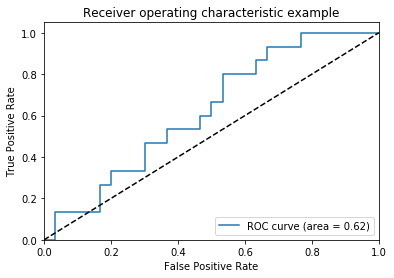

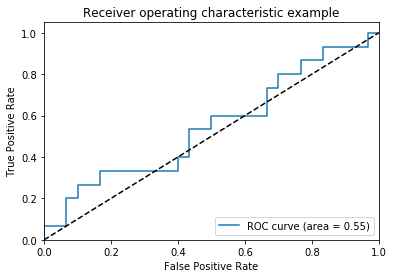

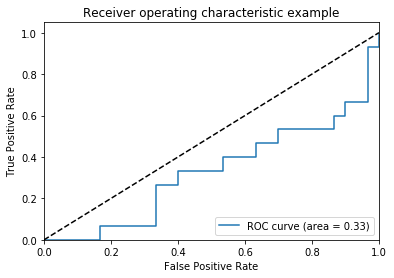

Average ROC curve (area) score:  0.5


In [160]:
#Linear Regression ROC calculation

#calculating the value according 0, 0 is 1 rest -1
roc_0 = Y_test.copy()
for i in range(len(Y_test)):
    if Y_test[i] != 0: roc_0[i] = -1
    else: roc_0[i] = 1

#calculating the value according 1, 1 is 1 rest -1
roc_1 = Y_test.copy()
for i in range(len(Y_test)):
    if Y_test[i] != 1: roc_1[i] = -1
    else: roc_1[i] = 1

#calculating the value according 2, 2 is 1 rest -1
roc_2 = Y_test.copy()
for i in range(len(Y_test)):
    if Y_test[i] != 2: roc_2[i] = -1
    else: roc_2[i] = 1

#Individual ROC curve calculation
#For label 0
fpr_0, tpr_0, thresholds = roc_curve(roc_0, scores)
roc_auc_0 = auc(fpr_0, tpr_0)

#For label 1
fpr_1, tpr_1, thresholds = roc_curve(roc_1, scores)
roc_auc_1 = auc(fpr_1, tpr_1)

#For label 2
fpr_2, tpr_2, thresholds = roc_curve(roc_2, scores)
roc_auc_2 = auc(fpr_2, tpr_2)

#plotting ROC curve individual 

#For 0
displayROC(fpr_0, tpr_0, roc_auc_0)

#For 1
displayROC(fpr_1, tpr_1, roc_auc_1)

#For 2
displayROC(fpr_2, tpr_2, roc_auc_2)

#Average ROC
sum_roc = roc_auc_2 + roc_auc_1 + roc_auc_0
sum_roc = sum_roc / 3.0
print("Average ROC curve (area) score: ", sum_roc)

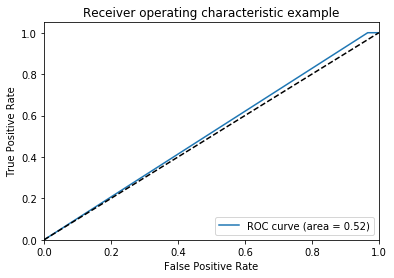

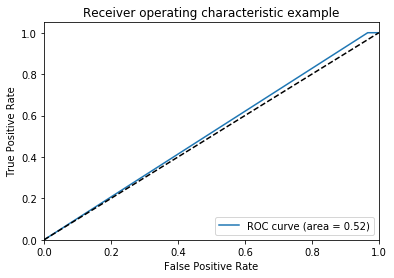

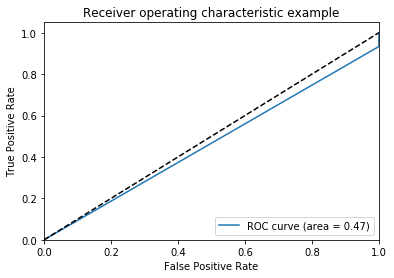

Average ROC curve (area) score:  0.5


In [161]:
#Logistic Regression ROC calculation
logReg = LogisticRegression(solver='liblinear', multi_class='ovr')
logReg.fit(Train_x, Train_y)
devTest_pred_log = logReg.predict(X_test)

#calculating the score for roc calculation
scores=[]

for i, j in sorted(zip(devTest_pred_log, Y_test)):
    scores.append(float(j)- i)

#calculating the value according 0, 0 is 1 rest -1
roc_0 = Y_test.copy()
for i in range(len(Y_test)):
    if Y_test[i] != 0: roc_0[i] = -1
    else: roc_0[i] = 1

#calculating the value according 1, 1 is 1 rest -1
roc_1 = Y_test.copy()
for i in range(len(Y_test)):
    if Y_test[i] != 1: roc_1[i] = -1
    else: roc_1[i] = 1

#calculating the value according 2, 2 is 1 rest -1
roc_2 = Y_test.copy()
for i in range(len(Y_test)):
    if Y_test[i] != 2: roc_2[i] = -1
    else: roc_2[i] = 1

#Individual ROC curve calculation
#For label 0
fpr_0, tpr_0, thresholds = roc_curve(roc_0, scores)
roc_auc_0 = auc(fpr_0, tpr_0)

#For label 1
fpr_1, tpr_1, thresholds = roc_curve(roc_1, scores)
roc_auc_1 = auc(fpr_1, tpr_1)

#For label 2
fpr_2, tpr_2, thresholds = roc_curve(roc_2, scores)
roc_auc_2 = auc(fpr_2, tpr_2)

#plotting ROC curve individual 

#For 0
displayROC(fpr_0, tpr_0, roc_auc_0)

#For 1
displayROC(fpr_1, tpr_1, roc_auc_1)

#For 2
displayROC(fpr_2, tpr_2, roc_auc_2)

#Average ROC
sum_roc = roc_auc_2 + roc_auc_1 + roc_auc_0
sum_roc = sum_roc / 3.0
print("Average ROC curve (area) score: ", sum_roc)